# Use Pyoso to analyze sequencer fees and user retention

In [1]:
# ! pip install pyoso

In [2]:
from dotenv import load_dotenv
import os
import pandas as pd
from pyoso import Client

load_dotenv()

OSO_API_KEY = os.environ['OSO_API_KEY']
client = Client(api_key=OSO_API_KEY)
stringify = lambda arr: "'" + "','".join(arr) + "'"

## Settings

In [3]:
ANALYSIS_START_DATE = "2024-12-20"
PROGRAM_START_DATE = "2025-03-20"
PROGRAM_END_DATE = "2025-06-12"
ANALYSIS_END_DATE = "2025-07-31"
TRAILING_DAYS = 7

### Project selection

- Use [oss-directory](https://github.com/opensource-observer/oss-directory/tree/main/data/projects) to find the correct project "name"
- For more details on how project files work, see [our docs](https://docs.opensource.observer/docs/projects/)
- Note: if a contract or deployer is missing from a project, open a pull request (or let us know)

In [4]:
PROJECT_OSO_NAME = 'avantis-labs'

In [5]:
# See all artifacts we've linked to a project
client.to_pandas(f"""
SELECT * FROM artifacts_by_project_v1
WHERE project_name = '{PROJECT_OSO_NAME}'
""")

,artifact_id,artifact_source_id,artifact_source,artifact_namespace,artifact_name,project_id,project_source,project_namespace,project_name
0,Ki1FpeTcQvqLDvypztZTI+9Pec0D1hDajGQB8H/jcPg=,808260536,GITHUB,avantis-labs,avantis-smart-contracts,8F71TphcQ+H6xUIi4Wgy77x8FmEKiV2lkhO7bpWlxU0=,OSS_DIRECTORY,oso,avantis-labs
1,5KBJ0tA02EjlDBZPbzHaaH4ocXULwcBvjJxrwQTMWGw=,0x5efce5ae5a44ed486491c8b46e60e259f5f5073c,BASE,,0x5efce5ae5a44ed486491c8b46e60e259f5f5073c,8F71TphcQ+H6xUIi4Wgy77x8FmEKiV2lkhO7bpWlxU0=,OSS_DIRECTORY,oso,avantis-labs
2,L5ZjOrHDTeD4IbHsnzyMVSlw8ndM8JULIEJimQEPgkQ=,0x1216d111d35fb660624885b2d37b09ce48151680,BASE,,0x1216d111d35fb660624885b2d37b09ce48151680,8F71TphcQ+H6xUIi4Wgy77x8FmEKiV2lkhO7bpWlxU0=,OSS_DIRECTORY,oso,avantis-labs
3,v0iL+s5fgExcT6lzeK7VeWy770f91GcEvHRisPtQfBU=,0x0694b956f76088c6e9f760d2e217c3ec9c678abb,BASE,,0x0694b956f76088c6e9f760d2e217c3ec9c678abb,8F71TphcQ+H6xUIi4Wgy77x8FmEKiV2lkhO7bpWlxU0=,OSS_DIRECTORY,oso,avantis-labs
4,C7aNarxNOAdrin7vHw5EBBu4321ahPMChORrfJgjg+Y=,0x188c9b5d497dad00f5868a9c64fa73f2f52eac3f,BASE,,0x188c9b5d497dad00f5868a9c64fa73f2f52eac3f,8F71TphcQ+H6xUIi4Wgy77x8FmEKiV2lkhO7bpWlxU0=,OSS_DIRECTORY,oso,avantis-labs
...,...,...,...,...,...,...,...,...,...
77,9W3p6+km5nPs84g23AyF1KkxEx/AkWfb9IGFzcXhcSs=,0x92ed158d5e423cfdc9eed5bd7328fff7ced6ff94,BASE,,0x92ed158d5e423cfdc9eed5bd7328fff7ced6ff94,8F71TphcQ+H6xUIi4Wgy77x8FmEKiV2lkhO7bpWlxU0=,OSS_DIRECTORY,oso,avantis-labs
78,ZrTEaMT10U3NuViGtLlN4kHjZ8Ad0H+DRrGU5OSelxo=,0xa13e591f1dd9e50693095de0f9f7597013aa61f7,BASE,,0xa13e591f1dd9e50693095de0f9f7597013aa61f7,8F71TphcQ+H6xUIi4Wgy77x8FmEKiV2lkhO7bpWlxU0=,OSS_DIRECTORY,oso,avantis-labs
79,w8xKwriDMMJWdQY1o2W7Ptp89KTpybhhMRVeuqMbJK8=,0x2d898e46a20ebfc1424d4bbf69bacd92dc1ae8bb,BASE,,0x2d898e46a20ebfc1424d4bbf69bacd92dc1ae8bb,8F71TphcQ+H6xUIi4Wgy77x8FmEKiV2lkhO7bpWlxU0=,OSS_DIRECTORY,oso,avantis-labs
80,7DZ+/qoXkjABBGk622zh80ekgISTx5yYRufK+Cnlel0=,0xad69620e2ca64bdde7f3ea0545368ecfe5eb1446,BASE,,0xad69620e2ca64bdde7f3ea0545368ecfe5eb1446,8F71TphcQ+H6xUIi4Wgy77x8FmEKiV2lkhO7bpWlxU0=,OSS_DIRECTORY,oso,avantis-labs


In [6]:
TARGET_CHAIN = 'BASE'

## Lookup precomputed metrics for a project/chain

In [7]:
df_sample_metrics = client.to_pandas(f"""
SELECT
  sample_date,
  metric_name,
  amount
FROM timeseries_metrics_by_project_v0
JOIN metrics_v0 USING (metric_id)
JOIN projects_v1 USING (project_id)
WHERE
  sample_date BETWEEN DATE('{ANALYSIS_START_DATE}') AND DATE('{ANALYSIS_END_DATE}')
  AND project_name = '{PROJECT_OSO_NAME}'
  AND metric_name LIKE '{TARGET_CHAIN}_%'
  AND metric_name LIKE '%_daily'
""")

In [8]:
df_sample_metrics['metric_name'].value_counts()

metric_name
BASE_gas_fees_internal_daily               416
BASE_contract_invocations_daily            216
BASE_transactions_daily                    208
BASE_gas_fees_daily                        208
BASE_active_contracts_daily                208
BASE_active_addresses_aggregation_daily    208
BASE_defillama_tvl_daily                   204
BASE_defillama_lp_fee_daily                202
Name: count, dtype: Int64

<Axes: title={'center': 'Gas fees'}, xlabel='sample_date'>

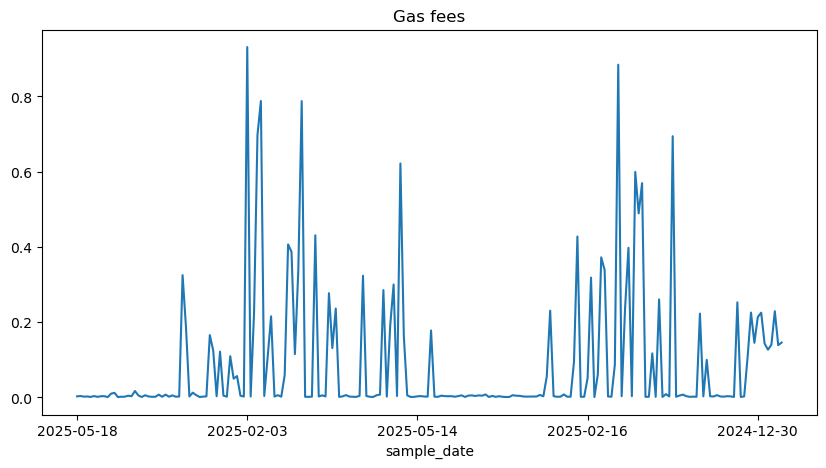

In [9]:
(
    df_sample_metrics[df_sample_metrics['metric_name'] == 'BASE_gas_fees_daily']
    .set_index('sample_date')['amount']
    .plot(
        title='Gas fees', figsize=(10,5)
    )
)

<Axes: title={'center': 'Gas fees (rolling avg)'}, xlabel='sample_date'>

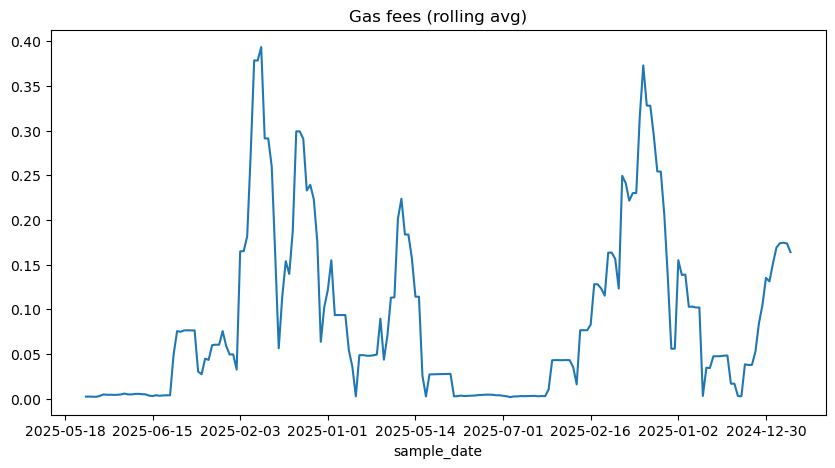

In [10]:
(
    df_sample_metrics[df_sample_metrics['metric_name'] == 'BASE_gas_fees_daily']
    .set_index('sample_date')['amount']
    .rolling(window=TRAILING_DAYS)
    .mean()
    .plot(
        title='Gas fees (rolling avg)', figsize=(10,5)
    )
)

<Axes: title={'center': 'Daily active addresses'}, xlabel='sample_date'>

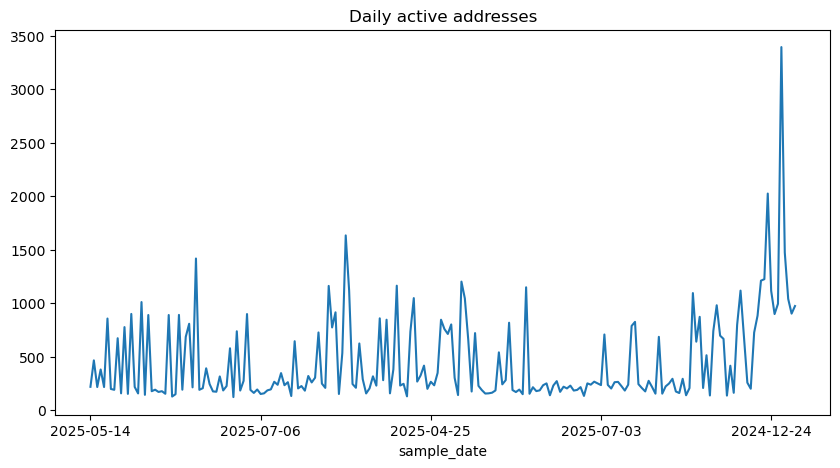

In [11]:
(
    df_sample_metrics[df_sample_metrics['metric_name'] == 'BASE_active_addresses_aggregation_daily']
    .set_index('sample_date')['amount']
    .plot(
        title='Daily active addresses', figsize=(10,5)
    )
)

## Create a custom user retention metric

To do this, we will need to go deeper into our event models. We have one that precomputes certain types of blockchain events on a daily basis. This may require some trial and error!

In [12]:
df = client.to_pandas(f"""
SELECT
  e.bucket_day,
  e.from_artifact_id AS user_id,
  SUM(e.count) AS count_txns
FROM int_events_daily__blockchain AS e
JOIN artifacts_by_project_v1 AS abp ON e.to_artifact_id = abp.artifact_id
WHERE
  e.bucket_day BETWEEN DATE('{ANALYSIS_START_DATE}') AND DATE('{ANALYSIS_END_DATE}')
  AND abp.project_name = '{PROJECT_OSO_NAME}'
  AND e.event_source = '{TARGET_CHAIN}'
  AND e.event_type = 'CONTRACT_INVOCATION'
GROUP BY 1,2
ORDER BY 1
""")

In [13]:
df

,bucket_day,user_id,count_txns
0,2024-12-20,SIJasCgpeMfPqmEHE7sq+VhLJgVNHmR4FNt3h0mllWs=,1
1,2024-12-20,QglYGxWE0d8BcIXV+jDBHYnvf3UrsY+yc3g9aY6bT8c=,2
2,2024-12-20,2GUrCcHCMjGVsVuB9AsSHz9yveh3Qf5tr1xB8bphkUU=,1
3,2024-12-20,sPNF8EmKfCkX0s+ggXuli5XK4xgHjy0utY2FWW5C8Co=,8
4,2024-12-20,m7ZGhRBrBbrAbpyihhrINXTuwas3hvsx3BK1g6AV5kk=,2
...,...,...,...
93149,2025-07-15,ZhmEEVfcZS0GMP2fGTPHJv22NQAGn2d628Arc2Sn3tQ=,1
93150,2025-07-15,YS0ael25W3QNEtFexKAiD/e1m88lufho2zMEH0C/lFc=,2
93151,2025-07-15,jx7sjifGHkyv9zfCw7kGDe96XjttZvV69HAaRyjWLJ8=,2
93152,2025-07-15,wB6k9+FMfXUHOrxgo6QR2fEyArBjbAtQ7ybrNkMzokY=,2


In [14]:
df['bucket_day'] = pd.to_datetime(df['bucket_day'])
df['active'] = df['count_txns'] > 0

In [15]:
# pivot to day x user boolean matrix
m = df.pivot_table(
    index='bucket_day',
    columns='user_id',
    values='active',
    aggfunc='max',
    fill_value=False
)
m

user_id,++6XDTw9qLr2tCuOXQEMBC3ej3Iw82uY7cq/5wkDfwk=,++RipQ5MO4VQRKxf0MgEehB+FymrF17lz79S76bsr9k=,++lChUbfW1+25sl+AgiWld1tB3bXtJaB0D/x3kIamCw=,++pCW4Lc4NgRyhENtxMilyz7hn9cSUajyhUOhgFSGAM=,+/3SWRSevfxBfBBrco0By2/r2HpnhGhBaZFzeTjKbLE=,+/5yU6I6MY304ehwwce0Pnth5MiHFGBs6UJDZK+mdvk=,+/c7/KYtuQkZQEN02gdJrDw5ywh6LHlfdo1d+NphpYI=,+/fNLPwyfcNaSha7Yp7qlLsrAUll45ABlFxDBjCwGTI=,+/gHreUYN78OxaludXyfiBk2Fn1U8d8c6pbo7dC9nBY=,+/o1jiDsThQ4VmA9eGAhgP4aIrCNRFX8jSE1zdPb2TM=,...,zy9MVL5RpcBqw1UY5jCrPNc6+RSfuuOzFRn9sJ8VgCQ=,zyBEI0RBYTW1aizFPLS0CitkIxGvacazmdFHlWu/jDY=,zyPQdENGsGDprk6KIk//yVrXTMvmytlFhTTxHN3rKqk=,zydLBsK9XLqaSr9pTD3e+j9+pAVRcN90kDXioOU7y58=,zyjoOafMNBuqWGb43By1HgHnEnn0jM1/iM9xUUxDvNo=,zypmuOYl/XS6Nr/Fo9FK17aDJROcdZaq9gGS9HBRGPg=,zysTAcu43nQBV9sCtvxgDlh7JWUaiVt5CWT6/4XqoKs=,zz6RsKQRz00dD9TwPL58q5Ulj2CpeD7J7I9OP/ETYqU=,zzIJV50j8g8ZoRnLeslm6GkDXs0jMq0oK5QZoWvvhN8=,zzz7n+IvIFfPWMZbeW6d3cBJsutwn7LGUTA35RkAflw=
bucket_day,,,,,,,,,,,,,,,,,,,,,
2024-12-20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-12-21,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-12-22,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2024-12-23,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2024-12-24,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-07-11,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-07-12,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2025-07-13,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [16]:
# simple brute force 7-day retention series :)
ret = []
for day in m.index:
    day7 = day + pd.Timedelta(days=TRAILING_DAYS)
    if day7 in m.index:
        cohort = m.loc[day]
        nxt = m.loc[day7]
        users = cohort[cohort].index
        rate = nxt.loc[users].sum() / len(users)
        ret.append({'bucket_day': day, 'retention': rate})
ret_df = pd.DataFrame(ret).set_index('bucket_day').sort_index()
ret_df

,retention
bucket_day,
2024-12-20,0.251022
2024-12-21,0.292044
2024-12-22,0.317386
2024-12-23,0.287777
2024-12-24,0.240575
...,...
2025-07-04,0.198830
2025-07-05,0.163934
2025-07-06,0.100000


<Axes: title={'center': '7 day user retention'}, xlabel='bucket_day'>

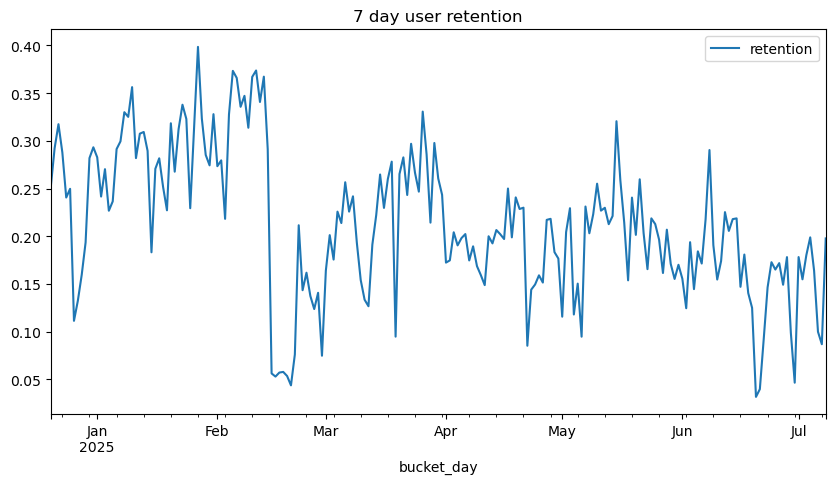

In [17]:
ret_df.plot(title='7 day user retention', figsize=(10,5))

In [18]:
# split pre- and post-program
pre  = ret_df.loc[: pd.to_datetime(PROGRAM_START_DATE) - pd.Timedelta(days=1)]
post = ret_df.loc[ pd.to_datetime(PROGRAM_END_DATE) :]

print("Pre-program 7-day retention:",  pre['retention'].mean())
print("Post-program 7-day retention:", post['retention'].mean())

Pre-program 7-day retention: 0.24001944468804884
Post-program 7-day retention: 0.14871249180570592
